In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
df=pd.read_parquet("/content/drive/MyDrive/Mini project 5018/WebAttacks-Thursday-no-metadata.parquet")
df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,113095465,48,24,9668,10012,403,0,201.416672,203.548294,...,32,203985.500,5.758372e+05,1629110,379,13800000.0,4277541.0,16500000,6737603,Benign
1,6,113473706,68,40,11364,12718,403,0,167.117645,171.919418,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4229413.0,16500000,6945512,Benign
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.500,1.170000e+07,20400000,6,24400000.0,24300000.0,60100000,5702188,Benign
3,6,60261928,9,7,2330,4221,1093,0,258.888885,409.702148,...,20,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
4,17,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155815,6,49,3,0,76,0,45,0,25.333334,23.028967,...,32,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
155816,6,1286687,41,42,2664,6954,456,0,64.975609,109.864571,...,32,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
155817,6,181,3,1,18,6,6,6,6.000000,0.000000,...,20,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
155818,6,217,2,1,31,6,31,0,15.500000,21.920311,...,32,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign


In [ ]:

# df_min = df.iloc[:-150000]
# print("Shape of trimmed dataset:", df_min.shape)
# df_min

In [ ]:

# print(df_min.columns)

# # If the columns are correctly named and ordered, you can drop them by index
# df_min.drop(df_min.columns[40:61], axis=1, inplace=True)

# # Verify the DataFrame after dropping the columns
# df_min


Acc with all Features

---



In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Load your dataset
df = pd.read_parquet("/content/drive/MyDrive/Mini project 5018/WebAttacks-Thursday-no-metadata.parquet")

# Separate features and target variable
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target variable

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a classifier using all features
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy_rfall = accuracy_score(y_test, y_pred)
precision_rfall = precision_score(y_test, y_pred, average='weighted', zero_division='warn')
recall_rfall = recall_score(y_test, y_pred, average='weighted', zero_division='warn')
f1_rfall = f1_score(y_test, y_pred, average='weighted', zero_division='warn')


print("Accuracy with all features:", accuracy_rfall)
print("Precision with Random Forest and all features:", precision_rfall)
print("Recall with Random Forest and all features:", recall_rfall)
print("F1 score with Random Forest and all features:", f1_rfall)


Accuracy with all features: 0.9953471954819664
Precision with Random Forest and all features: 0.9948350660620747
Recall with Random Forest and all features: 0.9953471954819664
F1 score with Random Forest and all features: 0.9950234706462628


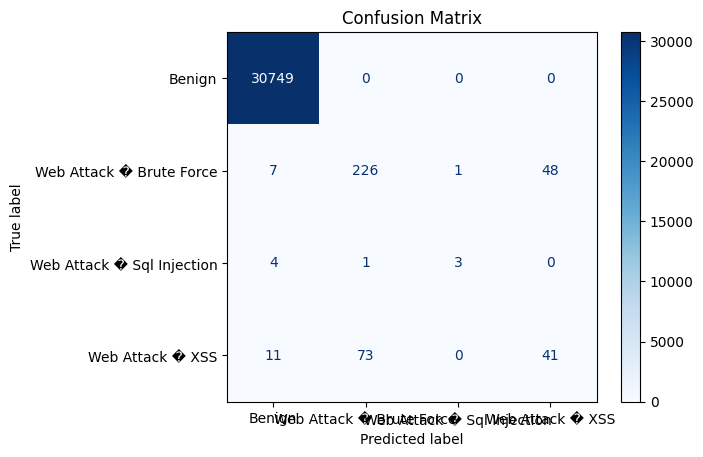

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [11]:
from sklearn.svm import SVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Support Vector Machine classifier using all features
clf = SVC()
clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_svmall = accuracy_score(y_test, y_pred)
precision_svmall = precision_score(y_test, y_pred, average='weighted', zero_division='warn')
recall_svmall = recall_score(y_test, y_pred, average='weighted', zero_division='warn')
f1_svmall = f1_score(y_test, y_pred, average='weighted', zero_division='warn')

print("Accuracy with SVM and all features:", accuracy_svmall)
print("Precision with SVM and all features:", precision_svmall)
print("Recall with SVM and all features:", recall_svmall)
print("F1 score with SVM and all features:", f1_svmall)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy with SVM and all features: 0.9905018611218072
Precision with SVM and all features: 0.9934869084557678
Recall with SVM and all features: 0.9905018611218072
F1 score with SVM and all features: 0.9897336948624702


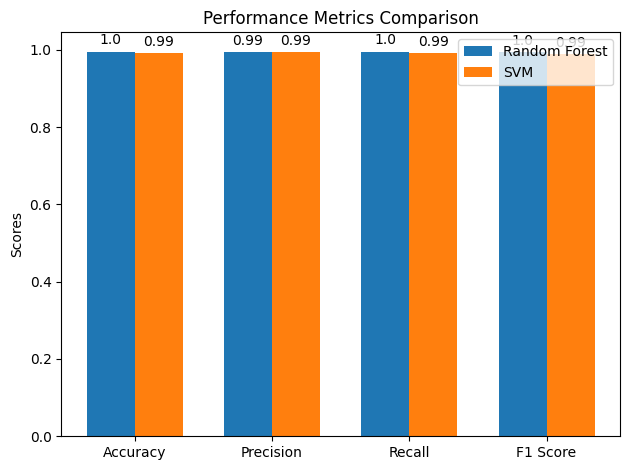

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Random Forest
metrics_rf = [accuracy_rfall, precision_rfall, recall_rfall, f1_rfall]

# Metrics for SVM
metrics_svm = [accuracy_svmall, precision_svmall, recall_svmall, f1_svmall]

# Labels for the metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Positions for bars on x-axis
x = np.arange(len(labels))

# Width of the bars
width = 0.35

# Plotting
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, metrics_rf, width, label='Random Forest')
rects2 = ax.bar(x + width/2, metrics_svm, width, label='SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add the actual value on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


PCA


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
df = pd.read_parquet("/content/drive/MyDrive/Mini project 5018/WebAttacks-Thursday-no-metadata.parquet")

# Separate features and target variable
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target variable

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a classifier
clf = RandomForestClassifier()
clf.fit(X_train_pca, y_train)

# Get the indices of the most influential features for each component
most_influential_features = []
for component in pca.components_:
    most_influential_features.append(X.columns[np.abs(component).argsort()[-1]])

# Print the selected features for each component
for i, feature in enumerate(most_influential_features):
    print(f"Component {i+1}: {feature}")


Component 1: Flow Duration
Component 2: Total Fwd Packets
Component 3: Bwd IAT Min
Component 4: Protocol
Component 5: Fwd Packet Length Mean
Component 6: Active Mean
Component 7: Flow Packets/s
Component 8: Active Mean
Component 9: RST Flag Count
Component 10: SYN Flag Count
Component 11: URG Flag Count
Component 12: Flow IAT Min
Component 13: Flow IAT Min
Component 14: Fwd Seg Size Min
Component 15: Idle Std
Component 16: FIN Flag Count
Component 17: Init Bwd Win Bytes
Component 18: Flow Bytes/s
Component 19: Idle Std
Component 20: Bwd Packets/s
Component 21: Bwd Packets/s


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_parquet("/content/drive/MyDrive/Mini project 5018/WebAttacks-Thursday-no-metadata.parquet")

# Separate features and target variable
X = df.drop(columns=['Label'])  # Features

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Get the indices of the most influential features for each component
most_influential_features_indices = []
for component in pca.components_:
    most_influential_features_indices.append(np.abs(component).argmax())

# Get the selected features from the original dataset
selected_features = X.columns[most_influential_features_indices]

# Create a new DataFrame with selected features
selected_features_df = X[selected_features].copy()

# Print the DataFrame with selected features
selected_features_df


,Flow Duration,Total Fwd Packets,Bwd IAT Min,Packet Length Min,Fwd Packet Length Mean,Active Mean,Flow Packets/s,Active Mean,RST Flag Count,SYN Flag Count,...,Flow IAT Min,Flow IAT Min,Fwd Seg Size Min,Idle Std,FIN Flag Count,Init Bwd Win Bytes,Flow Bytes/s,Flow Bytes/s,Fwd Packet Length Min,Bwd Packets/s
0,113095465,48,3,0,201.416672,203985.500,0.636630,203985.500,0,1,...,3,3,32,4277541.0,0,2079,1.740123e+02,1.740123e+02,0,0.212210
1,113473706,68,3,0,167.117645,178326.875,0.951762,178326.875,0,1,...,2,2,32,4229413.0,0,2081,2.122254e+02,2.122254e+02,0,0.352505
2,119945515,150,0,0,0.000000,6909777.500,1.250568,6909777.500,0,0,...,0,0,0,24300000.0,0,-1,0.000000e+00,0.000000e+00,0,0.000000
3,60261928,9,48,0,258.888885,0.000,0.265508,0.000,0,0,...,1,1,20,0.0,0,513,1.087088e+02,1.087088e+02,0,0.116160
4,269,2,4,51,51.000000,0.000,14869.888480,0.000,0,0,...,4,4,32,0.0,0,-1,1.576208e+06,1.576208e+06,51,7434.944336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155815,49,3,0,0,25.333334,0.000,61224.489800,0.000,0,1,...,2,2,32,0.0,0,-1,1.551020e+06,1.551020e+06,0,0.000000
155816,1286687,41,1,0,64.975609,0.000,64.506753,0.000,0,0,...,0,0,32,0.0,0,243,7.475011e+03,7.475011e+03,0,32.641972
155817,181,3,0,6,6.000000,0.000,22099.447510,0.000,0,0,...,1,1,20,0.0,1,0,1.325967e+05,1.325967e+05,6,5524.861816
155818,217,2,0,0,15.500000,0.000,13824.884790,0.000,0,1,...,78,78,32,0.0,0,0,1.705069e+05,1.705069e+05,0,4608.294922


In [15]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Split dataset into train and test sets using selected features
X_selected = df[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize selected features
scaler_selected = StandardScaler()
X_train_scaled = scaler_selected.fit_transform(X_train)
X_test_scaled = scaler_selected.transform(X_test)

# Train a classifier using selected features
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy_rfsf = accuracy_score(y_test, y_pred)
precision_rfsf = precision_score(y_test, y_pred, average='weighted', zero_division='warn')
recall_rfsf = recall_score(y_test, y_pred, average='weighted', zero_division='warn')
f1_rfsf = f1_score(y_test, y_pred, average='weighted', zero_division='warn')


print("Accuracy with selected features:", accuracy_rfsf)
print("Precision with Random Forest and selected features:", precision_rfsf)
print("Recall with Random Forest and selected features:", recall_rfsf)
print("F1 score with Random Forest and selected features:", f1_rfsf)


Accuracy with selected features: 0.9943524579643178
Precision with Random Forest and selected features: 0.9940233144037978
Recall with Random Forest and selected features: 0.9943524579643178
F1 score with Random Forest and selected features: 0.9941655726572977


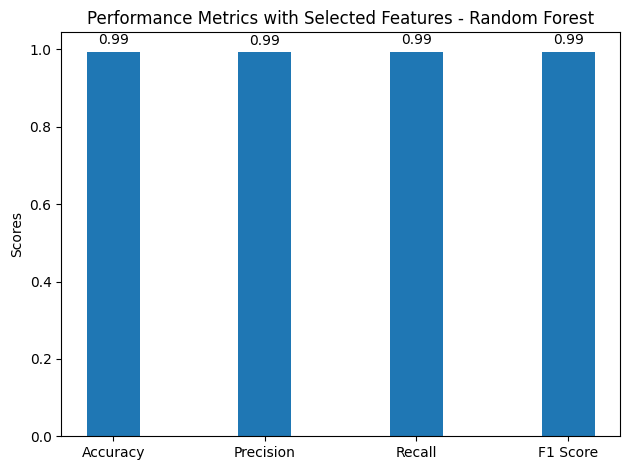

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Random Forest with selected features
metrics_rf_selected = [accuracy_rfsf, precision_rfsf, recall_rfsf, f1_rfsf]

# Labels for the metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Positions for bars on x-axis
x = np.arange(len(labels))

# Width of the bars
width = 0.35

# Plotting
fig, ax = plt.subplots()
rects = ax.bar(x, metrics_rf_selected, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics with Selected Features - Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Add the actual value on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

fig.tight_layout()

plt.show()


In [17]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Get the selected features from the original dataset
selected_features = X.columns[most_influential_features_indices]

# Split dataset into train and test sets using selected features
X_selected = df[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize selected features
scaler_selected = StandardScaler()
X_train_scaled = scaler_selected.fit_transform(X_train)
X_test_scaled = scaler_selected.transform(X_test)

# Train a Support Vector Machine classifier using selected features
clf = SVC()
clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_svmsf = accuracy_score(y_test, y_pred)
precision_svmsf = precision_score(y_test, y_pred,average='weighted', zero_division='warn')
recall_svmsf = recall_score(y_test, y_pred,average='weighted', zero_division='warn')
f1_svmsf = f1_score(y_test, y_pred,average='weighted', zero_division='warn')

# Print evaluation metrics
print("Accuracy with SVM and selected features:", accuracy_svmsf)
print("Precision with SVM and selected features:", precision_svmsf)
print("Recall with SVM and selected features:", recall_svmsf)
print("F1 score with SVM and selected features:", f1_svmsf)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy with SVM and selected features: 0.9901168014375562
Precision with SVM and selected features: 0.9887261752953684
Recall with SVM and selected features: 0.9901168014375562
F1 score with SVM and selected features: 0.9890813905120356


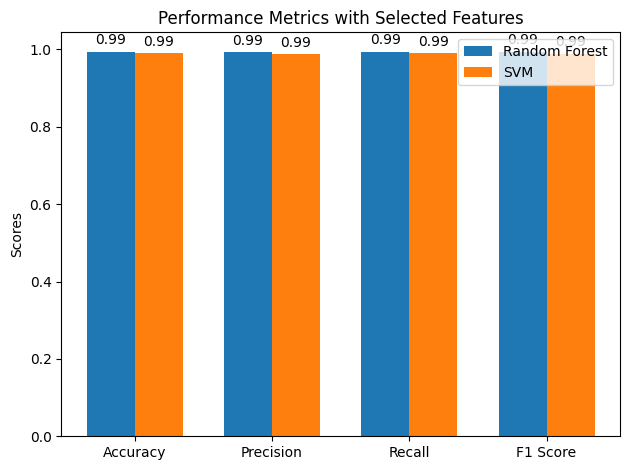

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Random Forest with selected features
metrics_rf_selected = [accuracy_rfsf, precision_rfsf, recall_rfsf, f1_rfsf]

# Metrics for SVM with selected features
metrics_svm_selected = [accuracy_svmsf, precision_svmsf, recall_svmsf, f1_svmsf]

# Labels for the metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Positions for bars on x-axis
x = np.arange(len(labels))

# Width of the bars
width = 0.35

# Plotting
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, metrics_rf_selected, width, label='Random Forest')
rects2 = ax.bar(x + width/2, metrics_svm_selected, width, label='SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics with Selected Features')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add the actual value on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


CHI SQUARE


In [4]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_parquet("/content/drive/MyDrive/Mini project 5018/WebAttacks-Thursday-no-metadata.parquet")

# Separate features and target variable
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target variable

# Scale features to a range of 0 to 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform feature selection using chi-square
k = 15  # Number of top features to select
selector = SelectKBest(chi2, k=k)
X_selected_chi = selector.fit_transform(X_scaled, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Create a new DataFrame with the selected features
selected_features_df_chi = X[selected_features]

# Print the DataFrame with selected features
selected_features_df_chi


,Protocol,Bwd Packet Length Min,Fwd IAT Std,Bwd IAT Total,Fwd PSH Flags,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Init Fwd Win Bytes,Init Bwd Win Bytes,Idle Mean,Idle Max,Idle Min
0,6,316,5.491986e+06,113000000,1,1,0,1,0,0,571,2079,13800000.0,16500000,6737603
1,6,126,4.719144e+06,113000000,1,1,0,1,0,0,390,2081,13800000.0,16500000,6945512
2,0,0,5.277837e+06,0,0,0,0,0,0,0,-1,-1,24400000.0,60100000,5702188
3,6,0,2.120000e+07,211947,0,0,1,0,0,0,8192,513,0.0,0,0
4,17,161,0.000000e+00,4,0,0,0,0,0,1,-1,-1,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155815,6,0,3.181981e+01,0,1,1,0,1,0,0,122,-1,0.0,0,0
155816,6,0,1.587295e+05,339094,0,0,1,0,0,1,29200,243,0.0,0,0
155817,6,6,1.414214e+00,0,0,0,0,0,0,0,0,0,0.0,0,0
155818,6,6,0.000000e+00,0,1,1,0,1,0,0,137,0,0.0,0,0


In [18]:

# Split dataset into train and test sets using selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected_chi, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier using selected features
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy_rfsfchi = accuracy_score(y_test, y_pred)
precision_rfsfchi = precision_score(y_test, y_pred, average='weighted', zero_division='warn')
recall_rfsfchi = recall_score(y_test, y_pred, average='weighted', zero_division='warn')
f1_rfsfchi = f1_score(y_test, y_pred, average='weighted', zero_division='warn')

# Print evaluation metrics
print("Accuracy with Random Forest and selected features from chi-square test:", accuracy_rfsfchi)
print("Precision with Random Forest and selected features from chi-square test:", precision_rfsfchi)
print("Recall with Random Forest and selected features from chi-square test:", recall_rfsfchi)
print("F1 score with Random Forest and selected features from chi-square test:", f1_rfsfchi)

Accuracy with Random Forest and selected features from chi-square test: 0.9928763958413555
Precision with Random Forest and selected features from chi-square test: 0.9926208913228671
Recall with Random Forest and selected features from chi-square test: 0.9928763958413555
F1 score with Random Forest and selected features from chi-square test: 0.992743284883462


In [ ]:

# Split dataset into train and test sets using selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected_chi, y, test_size=0.2, random_state=42)

# Standardize selected features
scaler_selected = StandardScaler()
X_train_scaled = scaler_selected.fit_transform(X_train)
X_test_scaled = scaler_selected.transform(X_test)

# Train a Support Vector Machine classifier using selected features
clf = SVC()
clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_svmsfchi = accuracy_score(y_test, y_pred)
precision_svmsfchi = precision_score(y_test, y_pred, average='weighted', zero_division='warn')
recall_svmsfchi = recall_score(y_test, y_pred, average='weighted', zero_division='warn')
f1_svmsfchi = f1_score(y_test, y_pred, average='weighted', zero_division='warn')

# Print evaluation metrics
print("Accuracy with SVM and selected features:", accuracy_svmsfchi)
print("Precision with SVM and selected features:", precision_svmsfchi)
print("Recall with SVM and selected features:", recall_svmsfchi)
print("F1 score with SVM and selected features:", f1_svmsfchi)


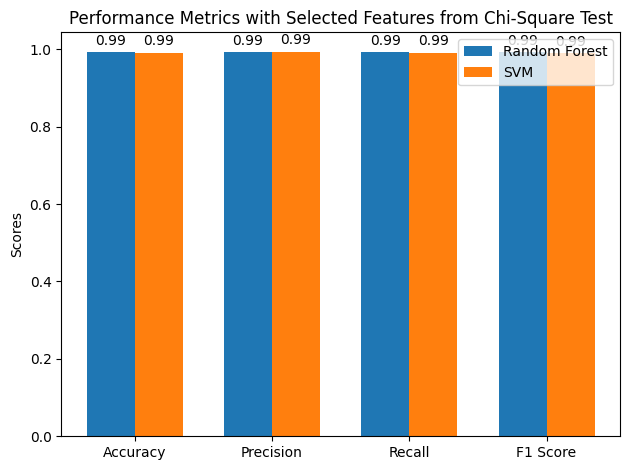

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Random Forest with selected features from chi-square test
metrics_rf_selected_chi = [accuracy_rfsfchi, precision_rfsfchi, recall_rfsfchi, f1_rfsfchi]

# Metrics for SVM with selected features from chi-square test
metrics_svm_selected_chi = [accuracy_svmsfchi, precision_svmsfchi, recall_svmsfchi, f1_svmsfchi]

# Labels for the metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Positions for bars on x-axis
x = np.arange(len(labels))

# Width of the bars
width = 0.35

# Plotting
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, metrics_rf_selected_chi, width, label='Random Forest')
rects2 = ax.bar(x + width/2, metrics_svm_selected_chi, width, label='SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics with Selected Features from Chi-Square Test')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add the actual value on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Random Forest classifier
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Confusion matrix for SVM classifier
conf_matrix_svm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix for Random Forest Classifier:")
print(conf_matrix_rf)

print("\nConfusion Matrix for SVM Classifier:")
print(conf_matrix_svm)


Confusion Matrix for Random Forest Classifier:
[[30645   104     0     0]
 [   36   246     0     0]
 [    8     0     0     0]
 [   10   112     0     3]]

Confusion Matrix for SVM Classifier:
[[30645   104     0     0]
 [   36   246     0     0]
 [    8     0     0     0]
 [   10   112     0     3]]


Accuracy with all features: 0.9951867539468617
Accuracy with selected features: 0.9943524579643178
Accuracy with Random Forest and selected features from chi-square test: 0.9929084841483763
Accuracy with SVM and all features: 0.9905018611218072
Accuracy with SVM and selected features: 0.9901168014375562
Accuracy with SVM and selected features: 0.9913361571043512


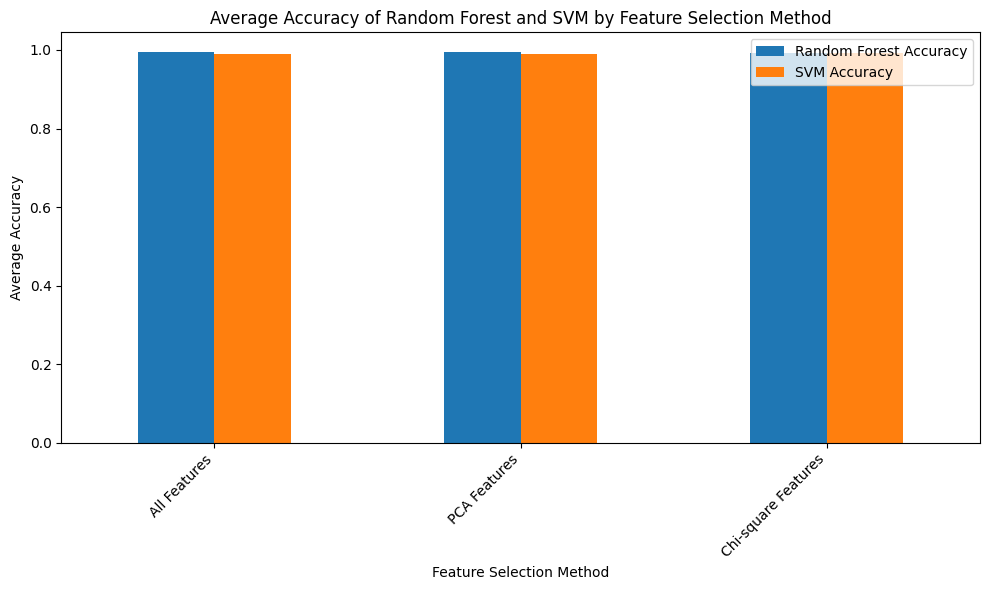

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_performance = pd.DataFrame({
    'Method': ['All Features', 'PCA Features', 'Chi-square Features'],
    'Random Forest Accuracy': [accuracy_rfall, accuracy_rfsf, accuracy_rfsfchi],
    'SVM Accuracy': [accuracy_svmall, accuracy_svmsf, accuracy_svmsfchi]
})

print("Accuracy with all features:", accuracy_rfall)
print("Accuracy with selected features:", accuracy_rfsf)
print("Accuracy with Random Forest and selected features from chi-square test:", accuracy_rfsfchi)
print("Accuracy with SVM and all features:", accuracy_svmall)
print("Accuracy with SVM and selected features:", accuracy_svmsf)
print("Accuracy with SVM and selected features:", accuracy_svmsfchi)

# Plot bar plot
ax = df_performance.plot(kind='bar', x='Method', figsize=(10, 6))
ax.set_ylabel('Average Accuracy')
ax.set_xlabel('Feature Selection Method')
plt.xticks(rotation=45, ha='right')
plt.title('Average Accuracy of Random Forest and SVM by Feature Selection Method')
plt.tight_layout()
plt.show()


AttributeError: 'Patch3D' object has no attribute '_path2d'

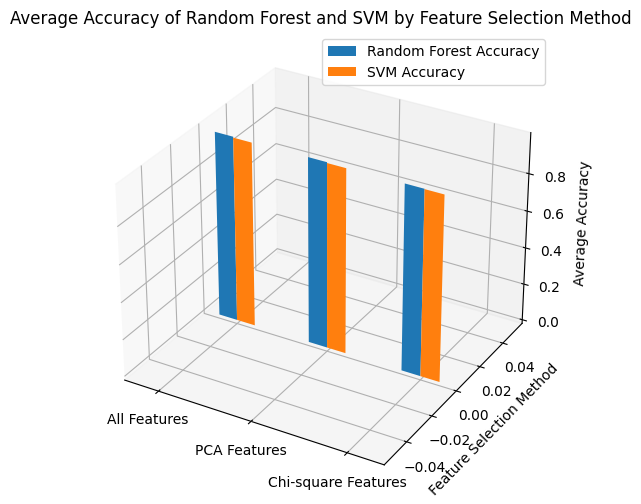

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the data
methods = ['All Features', 'PCA Features', 'Chi-square Features']
rf_accuracy = [accuracy_rfall, accuracy_rfsf, accuracy_rfsfchi]
svm_accuracy = [accuracy_svmall, accuracy_svmsf, accuracy_svmsfchi]

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Set bar positions
xpos = np.arange(len(methods))

# Plot bars for Random Forest accuracy
ax.bar(xpos - 0.1, rf_accuracy, zdir='y', width=0.2, label='Random Forest Accuracy')

# Plot bars for SVM accuracy
ax.bar(xpos + 0.1, svm_accuracy, zdir='y', width=0.2, label='SVM Accuracy')

# Set labels and title
ax.set_xticks(xpos)
ax.set_xticklabels(methods)
ax.set_ylabel('Feature Selection Method')
ax.set_zlabel('Average Accuracy')
ax.set_title('Average Accuracy of Random Forest and SVM by Feature Selection Method')

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


Precision with Random Forest and all features: 0.994720615939659
Precision with SVM and all features: 0.9934869084557678
Precision with Random Forest and selected features: 0.9939389700778959
Precision with SVM and selected features: 0.9887261752953684
Precision with Random Forest and selected features from chi-square test: 0.9927507856747813
Precision with SVM and selected features: 0.9937770470224702


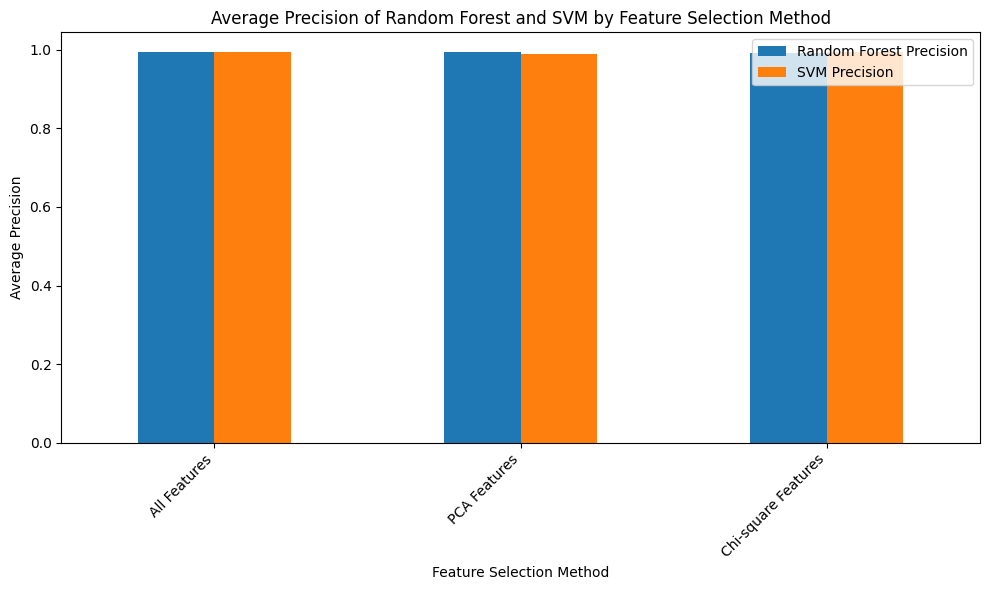

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_performance = pd.DataFrame({
    'Method': ['All Features', 'PCA Features', 'Chi-square Features'],
    'Random Forest Precision': [precision_rfall, precision_rfsf, precision_rfsfchi],
    'SVM Precision': [precision_svmall, precision_svmsf, precision_svmsfchi]
})

print("Precision with Random Forest and all features:", precision_rfall)
print("Precision with SVM and all features:", precision_svmall)
print("Precision with Random Forest and selected features:", precision_rfsf)
print("Precision with SVM and selected features:", precision_svmsf)
print("Precision with Random Forest and selected features from chi-square test:", precision_rfsfchi)
print("Precision with SVM and selected features:", precision_svmsfchi)

# Plot bar plot
ax = df_performance.plot(kind='bar', x='Method', figsize=(10, 6))
ax.set_ylabel('Average Precision')
ax.set_xlabel('Feature Selection Method')
plt.xticks(rotation=45, ha='right')
plt.title('Average Precision of Random Forest and SVM by Feature Selection Method')
plt.tight_layout()
plt.show()


Recall with Random Forest and all features: 0.9952509305609036
Recall with SVM and all features: 0.9905018611218072
Recall with Random Forest and selected features: 0.9944487228853806
Recall with SVM and selected features: 0.9901168014375562
Recall with Random Forest and selected features from chi-square test: 0.9928763958413555
Recall with SVM and selected features: 0.9913361571043512


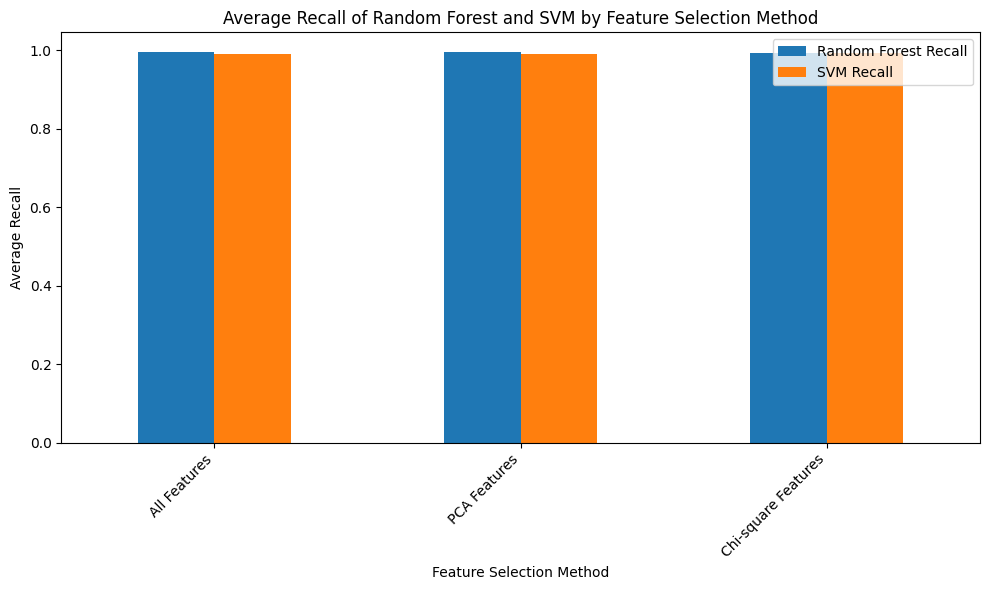

In [ ]:
 import pandas as pd
import matplotlib.pyplot as plt

df_performance = pd.DataFrame({
    'Method': ['All Features', 'PCA Features', 'Chi-square Features'],
    'Random Forest Recall': [recall_rfall, recall_rfsf, recall_rfsfchi],
    'SVM Recall': [recall_svmall, recall_svmsf, recall_svmsfchi]
})

print("Recall with Random Forest and all features:", recall_rfall)
print("Recall with SVM and all features:", recall_svmall)
print("Recall with Random Forest and selected features:", recall_rfsf)
print("Recall with SVM and selected features:", recall_svmsf)
print("Recall with Random Forest and selected features from chi-square test:", recall_rfsfchi)
print("Recall with SVM and selected features:", recall_svmsfchi)

# Plot bar plot
ax = df_performance.plot(kind='bar', x='Method', figsize=(10, 6))
ax.set_ylabel('Average Recall')
ax.set_xlabel('Feature Selection Method')
plt.xticks(rotation=45, ha='right')
plt.title('Average Recall of Random Forest and SVM by Feature Selection Method')
plt.tight_layout()
plt.show()


F1 score with Random Forest and all features: 0.9949080494969975
F1 score with SVM and all features: 0.9897336948624702
F1 score with Random Forest and selected features: 0.9941153302631588
F1 score with SVM and selected features: 0.9890813905120356
F1 score with Random Forest and selected features from chi-square test: 0.9928576002068112
F1 score with SVM and selected features: 0.9903182827613017


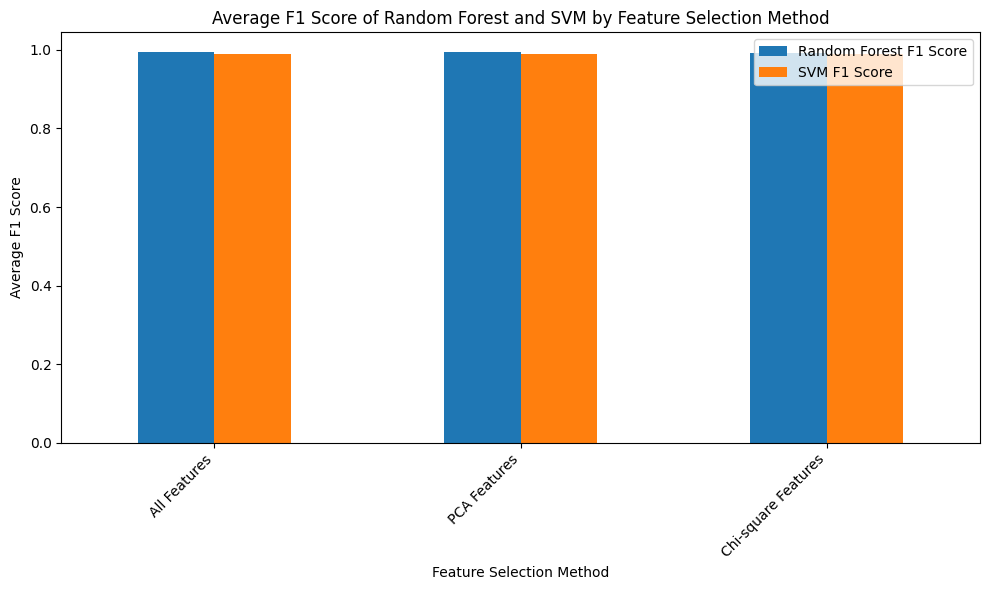

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_performance = pd.DataFrame({
    'Method': ['All Features', 'PCA Features', 'Chi-square Features'],
    'Random Forest F1 Score': [f1_rfall, f1_rfsf, f1_rfsfchi],
    'SVM F1 Score': [f1_svmall, f1_svmsf, f1_svmsfchi]
})

print("F1 score with Random Forest and all features:", f1_rfall)
print("F1 score with SVM and all features:", f1_svmall)
print("F1 score with Random Forest and selected features:", f1_rfsf)
print("F1 score with SVM and selected features:", f1_svmsf)
print("F1 score with Random Forest and selected features from chi-square test:", f1_rfsfchi)
print("F1 score with SVM and selected features:", f1_svmsfchi)

# Plot bar plot
ax = df_performance.plot(kind='bar', x='Method', figsize=(10, 6))
ax.set_ylabel('Average F1 Score')
ax.set_xlabel('Feature Selection Method')
plt.xticks(rotation=45, ha='right')
plt.title('Average F1 Score of Random Forest and SVM by Feature Selection Method')
plt.tight_layout()
plt.show()
